#

In [ ]:
pip install krippendorff

In [86]:
def draw_coding_plot_fixed(coder1, coder2):
    # Determine the number of codings (columns)
    num_codings = max(len(coder1), len(coder2))

    # Create a figure and axis with a fixed size
    fig, ax = plt.subplots(figsize=(10, 5))  # Fixed size for better control

    # Remove axis lines and ticks
    ax.axis('off')

    # Adding labels for Coders
    ax.text(-1, 2.5, 'Coder 1', fontsize=10, ha='right')
    ax.text(-1, 1, 'Coder 2', fontsize=10, ha='right')
    ax.set_aspect('equal')


    # Function to draw circles
    def draw_circles(codes, y_coord):
        for index, code in enumerate(codes):
            circle_color = 'black' if code == 1 else 'none'
            ax.add_patch(plt.Circle((index+0.5, y_coord), 0.4, color=circle_color, ec='black', lw=1))

    # Drawing circles for codings
    draw_circles(coder1, 2.8)
    draw_circles(coder2, 1.25)

    # Set plot limits
    ax.set_xlim(0, num_codings)
    ax.set_ylim(0.5, 5)

    # Show plot
    plt.show()


n: 65
Disagreement: 10%
Krippendorff's Alpha: 0.8164136622390892

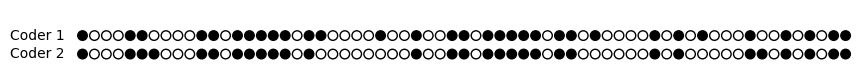

In [88]:
import numpy as np
import krippendorff

def calculate_krippendorffs_alpha(coder1, coder2):
    """Calculate Krippendorff's Alpha."""
    data = np.vstack([coder1, coder2])
    alpha = krippendorff.alpha(reliability_data=data, level_of_measurement='nominal')
    return alpha

def generate_controlled_coding(n_items, disagreement_rate):
    # Generate coder1 coding
    coder1 = np.random.choice([0, 1], size=n_items)

    # Initially set coder2 to be the same as coder1
    coder2 = np.copy(coder1)

    # Calculate the number of disagreements
    n_disagreements = int(n_items * (disagreement_rate / 100))

    # Introduce disagreements
    disagreement_indices = np.random.choice(n_items, n_disagreements, replace=False)
    for index in disagreement_indices:
        coder2[index] = 1 - coder2[index]

    return coder1, coder2

# Example usage
n_items = 65
disagreement_rate = 10 # 30% disagreement rate
coder1, coder2 = generate_controlled_coding(n_items, disagreement_rate)

print(f"n: {n_items}")
print(f"Disagreement: {disagreement_rate}%")
print(f"Krippendorff's Alpha: {calculate_krippendorffs_alpha(coder1, coder2)}")

draw_coding_plot_fixed(coder1, coder2)